In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('F:/cricket score prediction/IPL-First-Innings-Score-Prediction-Deployment-master/ipl.csv')

In [4]:
data.shape

(76014, 15)

In [5]:
data.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [6]:
data.head(5)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [7]:
data['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [8]:
# most total runs in the stadium
most_runs = pd.pivot_table(data,index=['venue'],values = ['total'],aggfunc=np.sum)

In [9]:
runs = most_runs.sort_values(by = 'total')

In [10]:
runs

,total
venue,
OUTsurance Oval,33840
"Vidarbha Cricket Association Stadium, Jamtha",55255
Buffalo Park,55800
De Beers Diamond Oval,58166
Nehru Stadium,75214
Green Park,79352
Holkar Cricket Stadium,97648
Newlands,107166
Shaheed Veer Narayan Singh International Stadium,108689


In [11]:
port = {'OUTsurance Oval':1, 'Vidarbha Cricket Association Stadium, Jamtha':2,
       'Buffalo Park':3, 'De Beers Diamond Oval':4, 'Nehru Stadium':5, 'Green Park':6,
       'Holkar Cricket Stadium':7, 'Newlands':8,
       'Shaheed Veer Narayan Singh International Stadium':9,
       'Sharjah Cricket Stadium':10, 'JSCA International Stadium Complex':11,
       'Sheikh Zayed Stadium':12, 'Dubai International Cricket Stadium':13,
       "St George's Park":14, 'New Wanderers Stadium':15, 'Barabati Stadium':16,
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium':17,
       'Himachal Pradesh Cricket Association Stadium':18,
       'Saurashtra Cricket Association Stadium':19, 'SuperSport Park':20,
       'Punjab Cricket Association IS Bindra Stadium, Mohali':21,
       'Sardar Patel Stadium, Motera':22, 'Brabourne Stadium':23, 'Kingsmead':24,
       'Dr DY Patil Sports Academy':25, 'Subrata Roy Sahara Stadium':26,
       'Maharashtra Cricket Association Stadium':27, 'Sawai Mansingh Stadium':28,
       'Punjab Cricket Association Stadium, Mohali':29,
       'Rajiv Gandhi International Stadium, Uppal':30,
       'MA Chidambaram Stadium, Chepauk':31, 'Eden Gardens':32, 'Wankhede Stadium':33,
       'Feroz Shah Kotla':34, 'M Chinnaswamy Stadium':35}

In [12]:
data['venue'] = data['venue'].map(port)

In [13]:
## from this most runs we got that the stadium is also affected for the runs in a match 

In [14]:
data['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [15]:
## Taking the current team that are playing in the IPL now
current_teams =  ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [16]:
## Droping the unwanted columns form the dataset
data.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [17]:
columns_to_remove = ['mid', 'batsman', 'bowler', 'striker', 'non-striker']
data.drop(labels=columns_to_remove, axis=1, inplace=True)

In [18]:
## we are creating a dataset which has only the teams that are playing currently
data = data[(data['bat_team'].isin(current_teams)) & (data['bowl_team'].isin(current_teams))]

In [19]:
## Removing the firts five overs from the data and we are starting the prediction after the five overs of the match
data = data[(data['overs']) > 5.0]

In [20]:
## Changing the object into datetime object 
data['date'].dtypes
from datetime import datetime
data['date'] = data['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [21]:
### Applying the onehot encoding for the categorical variables
encode_data = pd.get_dummies(data = data,columns = ['bat_team','bowl_team'])

In [22]:
encode_data.head(5)

,date,venue,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,35,61,0,5.1,59,0,222,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,35,61,1,5.2,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,35,61,1,5.3,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,35,61,1,5.4,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,35,61,1,5.5,58,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
# Splitting the data into train and test set
x_train = encode_data.drop(labels='total', axis=1)[encode_data['date'].dt.year <= 2016]
x_test = encode_data.drop(labels='total', axis=1)[encode_data['date'].dt.year >= 2017]

In [26]:
y_train = encode_data[encode_data['date'].dt.year <= 2016]['total'].values
y_test = encode_data[encode_data['date'].dt.year >= 2017]['total'].values

In [27]:
x_train.drop(labels='date', axis=True, inplace=True)
x_test.drop(labels='date', axis=True, inplace=True)

In [28]:
## Using the lasso Regression we are predicting

In [29]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [32]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(x_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-320.0939137513186


In [33]:
prediction=lasso_regressor.predict(x_test)

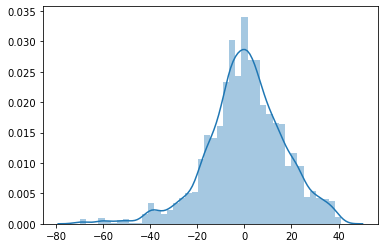

In [34]:
import seaborn as sb
sb.distplot(y_test-prediction)

In [36]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.429111553572602
MSE: 270.8051020650129
RMSE: 16.456156965252028
